In [87]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.models as models

In [88]:
import sys
sys.path.append("../scripts")

from train_utils import train_and_validate
from test_model import test_model

dataset import

In [89]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [90]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Caricamento dei dati di addestramento, validazione e test
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

# Suddivisione del dataset di addestramento in addestramento e validazione
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, val_size])

# Data augmentation per il dataset di addestramento
train_data_aug = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))

# Creazione dei loader per i dati di addestramento, validazione e test
train_loader = torch.utils.data.DataLoader(train_data_aug, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

vari modelli preaddestrati

In [91]:
class ResNetGray(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNetGray, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnet(x)

d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Train Loss: 0.5648, Train Acc: 79.80%, Valid Loss: 0.3917, Valid Acc: 85.31%
Epoch [2/100], Train Loss: 0.3938, Train Acc: 85.53%, Valid Loss: 0.3658, Valid Acc: 86.66%
Epoch [3/100], Train Loss: 0.3451, Train Acc: 87.24%, Valid Loss: 0.2955, Valid Acc: 89.38%
Epoch [4/100], Train Loss: 0.3272, Train Acc: 88.25%, Valid Loss: 0.3035, Valid Acc: 88.27%
Epoch [5/100], Train Loss: 0.3152, Train Acc: 88.43%, Valid Loss: 0.2538, Valid Acc: 90.73%
Epoch [6/100], Train Loss: 0.2773, Train Acc: 89.76%, Valid Loss: 0.2573, Valid Acc: 90.22%
Epoch [7/100], Train Loss: 0.2860, Train Acc: 89.75%, Valid Loss: 0.2676, Valid Acc: 90.28%
Epoch [8/100], Train Loss: 0.2538, Train Acc: 90.57%, Valid Loss: 0.2123, Valid Acc: 91.82%
Epoch [9/100], Train Loss: 0.2403, Train Acc: 91.20%, Valid Loss: 0.1981, Valid Acc: 92.42%
Epoch [10/100], Train Loss: 0.2412, Train Acc: 91.13%, Valid Loss: 0.1899, Valid Acc: 93.14%
Epoch [11/100], Train Loss: 0.2273, Train Acc: 91.41%, Valid Loss: 0.1882, Vali

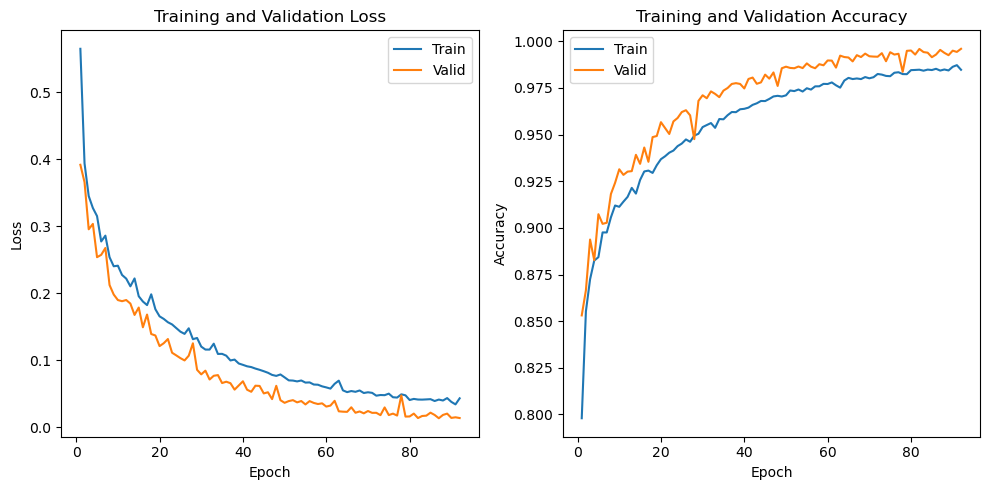

Test Accuracy: 92.32%
Precision: 0.9232
Recall: 0.9232
F1 Score: 0.9231


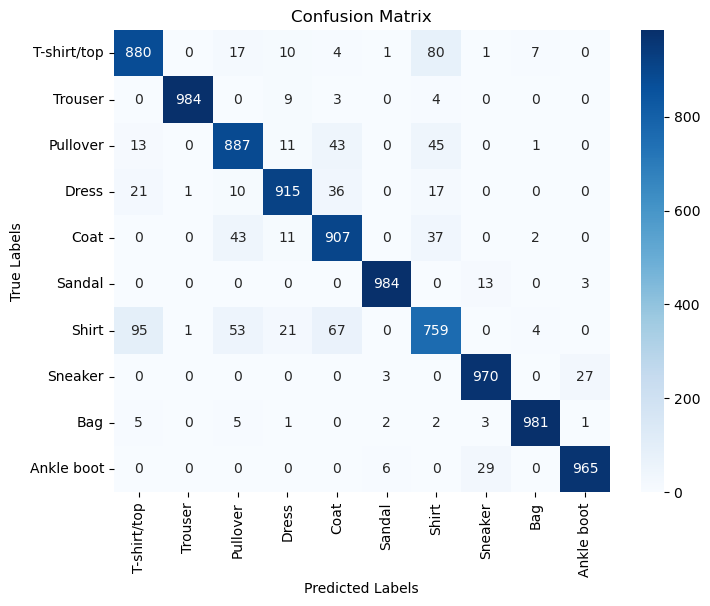

In [92]:
model1 = ResNetGray()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

train_and_validate(model1, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=5, plot=True, seed=42)

test_model(model1, test_loader, classes, seed=42)

In [93]:
class ResNet34Gray(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet34Gray, self).__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnet(x)

d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Train Loss: 0.5644, Train Acc: 79.81%, Valid Loss: 0.3918, Valid Acc: 85.36%
Epoch [2/100], Train Loss: 0.3856, Train Acc: 85.83%, Valid Loss: 0.3506, Valid Acc: 87.17%
Epoch [3/100], Train Loss: 0.3723, Train Acc: 86.56%, Valid Loss: 0.2957, Valid Acc: 88.97%
Epoch [4/100], Train Loss: 0.3614, Train Acc: 86.76%, Valid Loss: 0.3247, Valid Acc: 88.10%
Epoch [5/100], Train Loss: 0.3166, Train Acc: 88.38%, Valid Loss: 0.2607, Valid Acc: 90.36%
Epoch [6/100], Train Loss: 0.2874, Train Acc: 89.31%, Valid Loss: 0.2614, Valid Acc: 89.99%
Epoch [7/100], Train Loss: 0.2702, Train Acc: 90.00%, Valid Loss: 0.2544, Valid Acc: 90.66%
Epoch [8/100], Train Loss: 0.2668, Train Acc: 90.03%, Valid Loss: 0.2491, Valid Acc: 90.72%
Epoch [9/100], Train Loss: 0.2512, Train Acc: 90.73%, Valid Loss: 0.2377, Valid Acc: 91.09%
Epoch [10/100], Train Loss: 0.2448, Train Acc: 90.81%, Valid Loss: 0.2032, Valid Acc: 92.47%
Epoch [11/100], Train Loss: 0.2403, Train Acc: 91.07%, Valid Loss: 0.2031, Vali

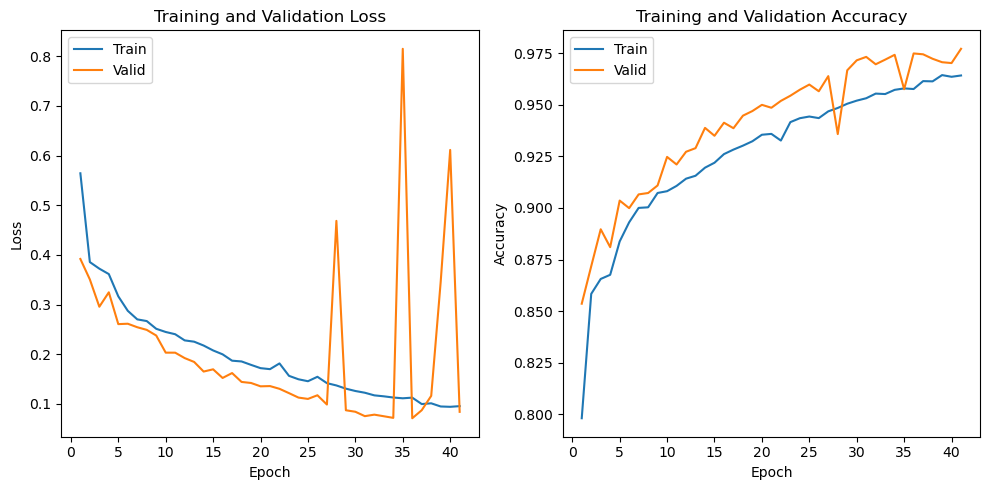

Test Accuracy: 92.19%
Precision: 0.9228
Recall: 0.9219
F1 Score: 0.9222


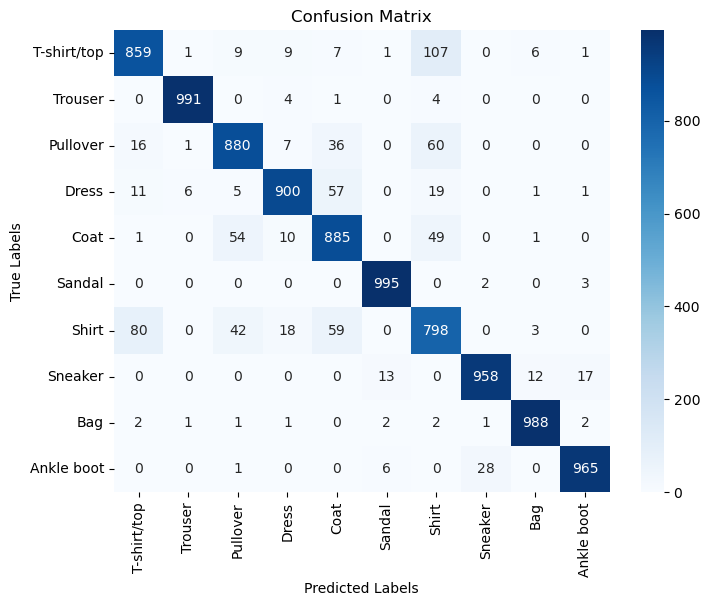

In [94]:
model2 = ResNet34Gray()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

train_and_validate(model2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=5, plot=True, seed=42)

test_model(model2, test_loader, classes, seed=42)

In [95]:
class ResNet50Gray(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet50Gray, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnet(x)

d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Train Loss: 0.6127, Train Acc: 78.63%, Valid Loss: 0.3791, Valid Acc: 86.07%
Epoch [2/100], Train Loss: 0.4014, Train Acc: 85.27%, Valid Loss: 0.3250, Valid Acc: 87.88%
Epoch [3/100], Train Loss: 0.3619, Train Acc: 86.83%, Valid Loss: 0.3071, Valid Acc: 89.06%
Epoch [4/100], Train Loss: 0.3264, Train Acc: 87.90%, Valid Loss: 0.3053, Valid Acc: 88.73%
Epoch [5/100], Train Loss: 0.3510, Train Acc: 87.56%, Valid Loss: 0.3241, Valid Acc: 88.28%
Epoch [6/100], Train Loss: 0.3246, Train Acc: 88.18%, Valid Loss: 0.3011, Valid Acc: 88.72%
Epoch [7/100], Train Loss: 0.3259, Train Acc: 88.24%, Valid Loss: 0.2841, Valid Acc: 89.30%
Epoch [8/100], Train Loss: 0.2852, Train Acc: 89.55%, Valid Loss: 0.2632, Valid Acc: 89.92%
Epoch [9/100], Train Loss: 0.2705, Train Acc: 90.01%, Valid Loss: 0.2197, Valid Acc: 91.67%
Epoch [10/100], Train Loss: 0.2572, Train Acc: 90.46%, Valid Loss: 0.2310, Valid Acc: 91.52%
Epoch [11/100], Train Loss: 0.2519, Train Acc: 90.63%, Valid Loss: 0.2100, Vali

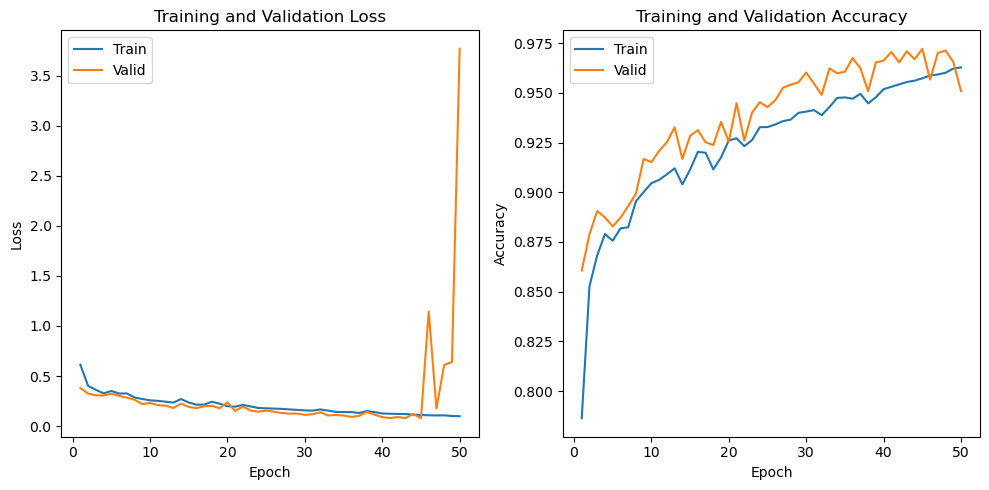

Test Accuracy: 89.72%
Precision: 0.9031
Recall: 0.8972
F1 Score: 0.8969


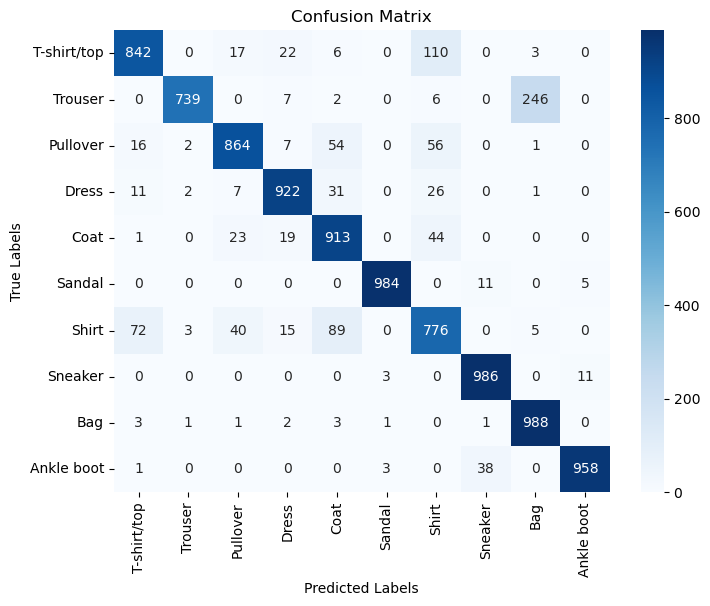

In [96]:
model3 = ResNet50Gray()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

train_and_validate(model3, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=5, plot=True, seed=42)

test_model(model3, test_loader, classes, seed=42)

Modelli aggiuntivi

In [97]:
class InceptionV3Gray(nn.Module):
    def __init__(self, num_classes=10):
        super(InceptionV3Gray, self).__init__()
        self.inception = models.inception_v3(pretrained=True)
        self.inception.Conv2d_1a_3x3.conv = nn.Conv2d(1, 32, kernel_size=3, stride=2, bias=False)
        num_ftrs = self.inception.fc.in_features
        self.inception.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.inception(x)

In [98]:
class ResNeXt50Gray(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNeXt50Gray, self).__init__()
        self.resnext = models.resnext50_32x4d(pretrained=True)
        self.resnext.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.resnext.fc.in_features
        self.resnext.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnext(x)
    
model_resnext = ResNeXt50Gray()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnext.parameters(), lr=0.001)

train_and_validate(model_resnext, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=5, plot=True, seed=42)

test_model(model_resnext, test_loader, classes, seed=42)

d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Train Loss: 0.6165, Train Acc: 78.71%, Valid Loss: 0.4565, Valid Acc: 83.12%
Epoch [2/100], Train Loss: 0.4616, Train Acc: 83.69%, Valid Loss: 0.4276, Valid Acc: 85.67%
Epoch [3/100], Train Loss: 0.3949, Train Acc: 85.81%, Valid Loss: 0.2965, Valid Acc: 89.01%
Epoch [4/100], Train Loss: 0.3573, Train Acc: 87.02%, Valid Loss: 0.3141, Valid Acc: 88.38%
Epoch [5/100], Train Loss: 0.3194, Train Acc: 88.28%, Valid Loss: 0.2736, Valid Acc: 89.96%
Epoch [6/100], Train Loss: 0.2995, Train Acc: 88.89%, Valid Loss: 0.2723, Valid Acc: 90.12%


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
